In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print("Ready for EDA!")
print(f"Pandas version: {pd.__version__}")

Ready for EDA!
Pandas version: 2.3.3


In [3]:
# Display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

In [4]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')  # Nice plot style
sns.set_palette("husl")                  # Colorful palette

In [5]:
print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")

Libraries loaded successfully!
Pandas version: 2.3.3


In [6]:
# Specify the file path
data_file = 'air_quality_data.csv'

In [8]:
# How many rows the file has
import os
if os.path.exists(data_file):
    print(f" File found: {data_file}")
    
    # Count rows 
    with open(data_file, 'r') as f:
        row_count = sum(1 for line in f) - 1  # -1 for header
    print(f"Total rows in dataset: {row_count:,}")
else:
    print(f" File not found: {data_file}")
    print(f"Current directory: {os.getcwd()}")
    print("\nMake sure your CSV file is in the project folder!")

 File found: air_quality_data.csv
Total rows in dataset: 5,617,325


In [9]:
# Load a sample 
sample_size = 10000

print(f"Loading first {sample_size:,} rows...")

df = pd.read_csv(data_file, nrows=sample_size)

print(f" Data loaded successfully!")
print(f" Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading first 10,000 rows...
 Data loaded successfully!
 Shape: 10,000 rows × 15 columns


In [10]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS OF DATA")
print("=" * 80)
df.head()

FIRST 5 ROWS OF DATA


,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles


In [11]:
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\n Column Names and Data Types:")
print(df.dtypes)

print("\n Memory Usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

print("\n Basic Statistics:")
df.info()

DATASET OVERVIEW

 Dataset Shape: 10,000 rows × 15 columns

 Column Names and Data Types:
Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_id                      object
state_name                    object
lat                          float64
lng                          float64
population                   float64
density                      float64
timezone                      object
dtype: object

 Memory Usage:
4.397849082946777 MB

 Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   CBS

In [12]:
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Count missing values per column
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})

# Only show columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

if len(missing_summary) > 0:
    print("\n Columns with missing values:")
    print(missing_summary)
else:
    print("\n No missing values found!")

# Visualize missing values
plt.figure(figsize=(10, 6))
if len(missing_summary) > 0:
    missing_summary['Percentage'].plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

MISSING VALUES ANALYSIS

 No missing values found!


<Figure size 1000x600 with 0 Axes>

In [13]:
print("=" * 80)
print("DATE COLUMN INSPECTION")
print("=" * 80)

# Look at the Date column
print("\nFirst 20 date values:")
print(df['Date'].head(20))

print("\n Unique date values (first 10):")
print(df['Date'].unique()[:10])

print("\n Date column data type:")
print(df['Date'].dtype)

# Check for problematic values
print("\n Checking for '########' or similar issues:")
problematic_dates = df[df['Date'].astype(str).str.contains('#', na=False)]
print(f"Found {len(problematic_dates)} rows with '#' in dates")

if len(problematic_dates) > 0:
    print("\nSample of problematic rows:")
    print(problematic_dates.head())

DATE COLUMN INSPECTION

First 20 date values:
0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
5     2022-01-06
6     2022-01-07
7     2022-01-08
8     2022-01-09
9     2022-01-10
10    2022-01-11
11    2022-01-12
12    2022-01-13
13    2022-01-14
14    2022-01-15
15    2022-01-16
16    2022-01-17
17    2022-01-18
18    2022-01-19
19    2022-01-20
Name: Date, dtype: object

 Unique date values (first 10):
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10']

 Date column data type:
object

 Checking for '########' or similar issues:
Found 0 rows with '#' in dates


AQI (AIR QUALITY INDEX) ANALYSIS

 AQI Statistics:
count   10000.00
mean       39.45
std        20.35
min         0.00
25%        31.00
50%        39.00
75%        47.00
max       775.00
Name: AQI, dtype: float64

 AQI Value Counts (top 10):
AQI
44    417
40    381
31    361
35    355
36    340
38    339
43    333
41    326
37    323
39    297
Name: count, dtype: int64


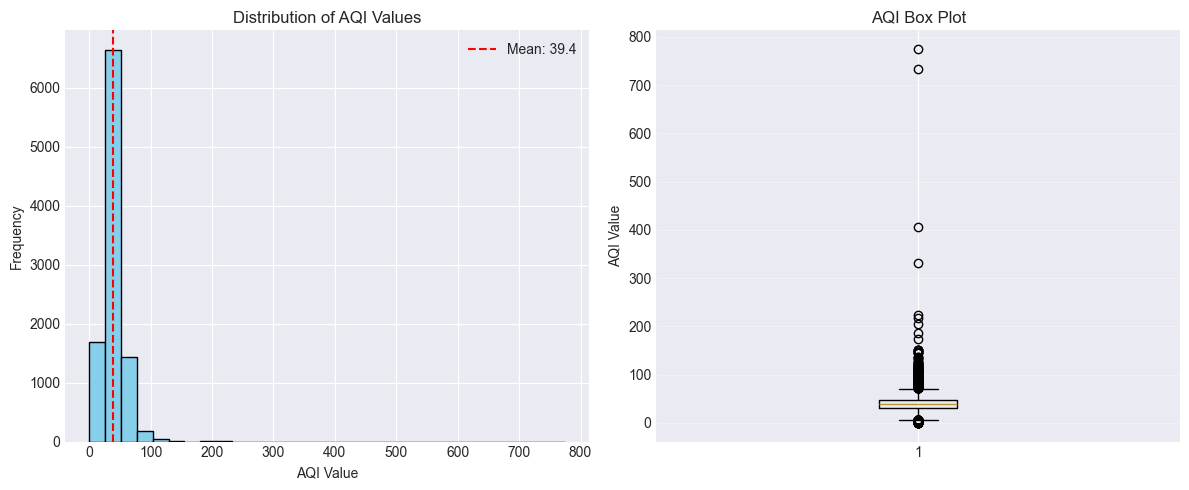


 AQI Range: 0 to 775
 Average AQI: 39.45
 Median AQI: 39.00


In [14]:
print("=" * 80)
print("AQI (AIR QUALITY INDEX) ANALYSIS")
print("=" * 80)

print("\n AQI Statistics:")
print(df['AQI'].describe())

print("\n AQI Value Counts (top 10):")
print(df['AQI'].value_counts().head(10))

# Visualize AQI distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['AQI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.axvline(df['AQI'].mean(), color='red', linestyle='--', label=f'Mean: {df["AQI"].mean():.1f}')
plt.legend()

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['AQI'], vert=True)
plt.ylabel('AQI Value')
plt.title('AQI Box Plot')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n AQI Range: {df['AQI'].min()} to {df['AQI'].max()}")
print(f" Average AQI: {df['AQI'].mean():.2f}")
print(f" Median AQI: {df['AQI'].median():.2f}")

GEOGRAPHIC DISTRIBUTION

 Number of unique cities: 119
 Number of unique states: 40

 Top 10 cities by number of readings:
city_ascii
Albany         298
Charleston     211
Cleveland      181
Columbus       181
Gainesville    180
Augusta        160
Columbia       151
Des Moines     151
Bangor         150
Decatur        149
Name: count, dtype: int64

 States with most readings:
state_name
Colorado          815
Georgia           777
Ohio              629
California        605
Iowa              537
South Carolina    458
Texas             451
Oregon            450
Illinois          397
New York          362
Name: count, dtype: int64


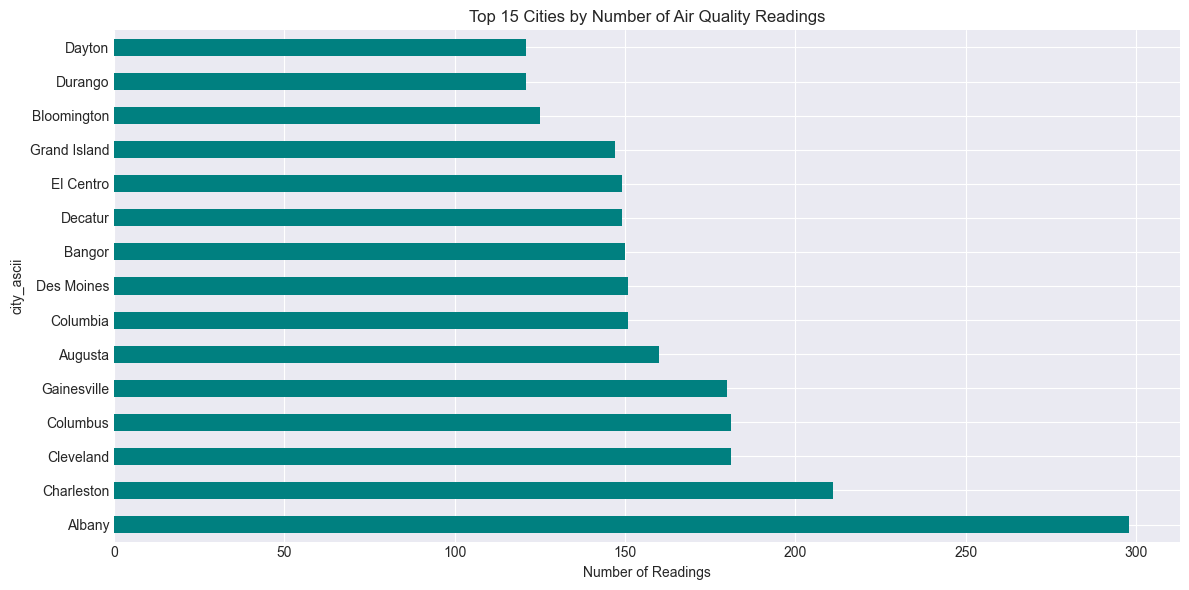

In [15]:
print("=" * 80)
print("GEOGRAPHIC DISTRIBUTION")
print("=" * 80)

print(f"\n Number of unique cities: {df['city_ascii'].nunique()}")
print(f" Number of unique states: {df['state_name'].nunique()}")

print("\n Top 10 cities by number of readings:")
print(df['city_ascii'].value_counts().head(10))

print("\n States with most readings:")
print(df['state_name'].value_counts().head(10))

# Visualize top cities
plt.figure(figsize=(12, 6))
top_cities = df['city_ascii'].value_counts().head(15)
top_cities.plot(kind='barh', color='teal')
plt.xlabel('Number of Readings')
plt.title('Top 15 Cities by Number of Air Quality Readings')
plt.tight_layout()
plt.show()

TEMPORAL ANALYSIS (TIME-BASED)

 Successfully converted 10000 dates
 Failed to convert 0 dates

 Date Range:
  First date: 2022-01-01 00:00:00
  Last date: 2022-05-31 00:00:00
  Time span: 150 days


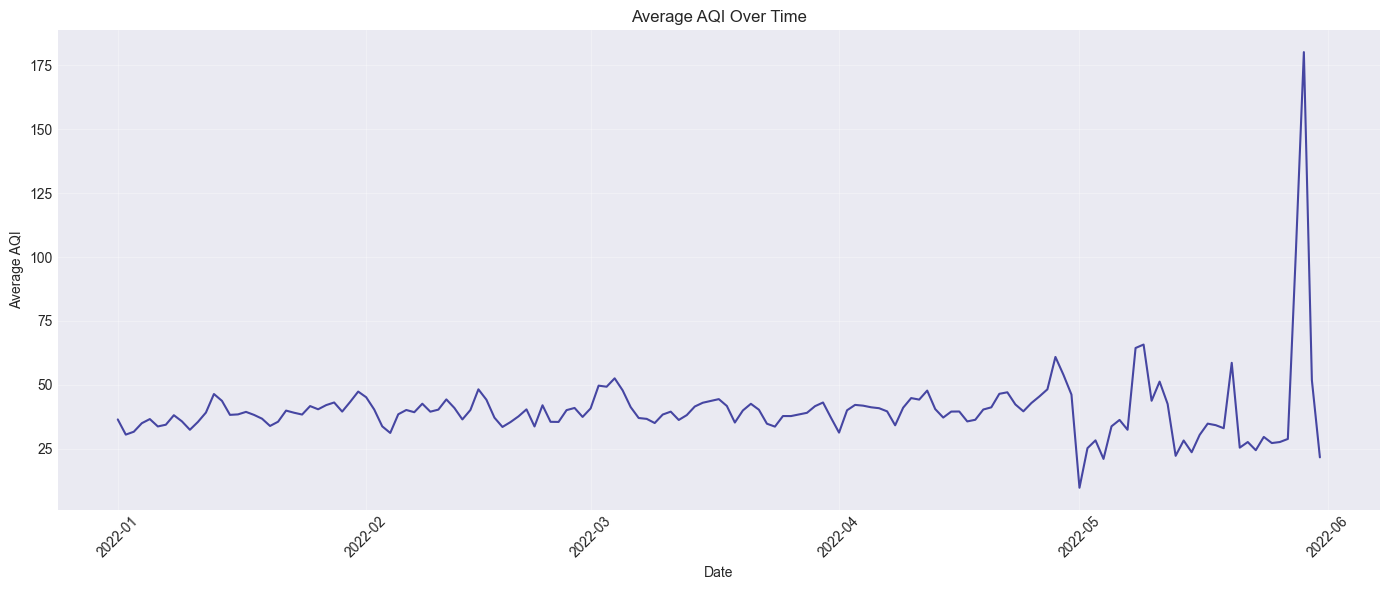

In [16]:
print("=" * 80)
print("TEMPORAL ANALYSIS (TIME-BASED)")
print("=" * 80)

# Convert Date to proper datetime format
try:
    # Remove any rows where Date contains '#'
    df_clean = df[~df['Date'].astype(str).str.contains('#', na=False)].copy()
    
    # Convert to datetime
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    
    print(f"\n Successfully converted {len(df_clean)} dates")
    print(f" Failed to convert {len(df) - len(df_clean)} dates")
    
    print("\n Date Range:")
    print(f"  First date: {df_clean['Date'].min()}")
    print(f"  Last date: {df_clean['Date'].max()}")
    print(f"  Time span: {(df_clean['Date'].max() - df_clean['Date'].min()).days} days")
    
    # Group by date and plot
    daily_avg = df_clean.groupby('Date')['AQI'].mean()
    
    plt.figure(figsize=(14, 6))
    plt.plot(daily_avg.index, daily_avg.values, color='navy', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Average AQI')
    plt.title('Average AQI Over Time')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" Error processing dates: {e}")
    print("We'll handle date cleaning in the next phase.")

In [17]:
print("=" * 80)
print("COMPREHENSIVE DATA SUMMARY REPORT")
print("=" * 80)

print(f"""
 DATASET DIMENSIONS
  • Total rows: {df.shape[0]:,}
  • Total columns: {df.shape[1]}
  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

 DATA TYPES
  • Numeric columns: {df.select_dtypes(include=[np.number]).columns.tolist()}
  • Text columns: {df.select_dtypes(include=['object']).columns.tolist()}
  
 GEOGRAPHIC COVERAGE
  • Unique cities: {df['city_ascii'].nunique()}
  • Unique states: {df['state_name'].nunique()}
  • Most monitored city: {df['city_ascii'].value_counts().index[0]}

 AIR QUALITY METRICS
  • Average AQI: {df['AQI'].mean():.2f}
  • AQI range: {df['AQI'].min()} to {df['AQI'].max()}
  • Most common category: {df['Category'].value_counts().index[0]}

 DATA QUALITY
  • Missing values: {df.isnull().sum().sum()} cells
  • Duplicate rows: {df.duplicated().sum()}
""")

print("=" * 80)

COMPREHENSIVE DATA SUMMARY REPORT

 DATASET DIMENSIONS
  • Total rows: 10,000
  • Total columns: 15
  • Memory usage: 4.40 MB

 DATA TYPES
  • Numeric columns: ['Unnamed: 0', 'CBSA Code', 'AQI', 'Number of Sites Reporting', 'lat', 'lng', 'population', 'density']
  • Text columns: ['Date', 'Category', 'Defining Parameter', 'city_ascii', 'state_id', 'state_name', 'timezone']

 GEOGRAPHIC COVERAGE
  • Unique cities: 119
  • Unique states: 40
  • Most monitored city: Albany

 AIR QUALITY METRICS
  • Average AQI: 39.45
  • AQI range: 0 to 775
  • Most common category: Good

 DATA QUALITY
  • Missing values: 0 cells
  • Duplicate rows: 0

